In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
import os

import pandas_datareader as pdr
from darts import TimeSeries
from darts.models import ExponentialSmoothing, AutoARIMA, Prophet

import warnings
warnings.filterwarnings('ignore')

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
if os.path.exists("btc.csv"):
    bitcoin_data = pd.read_csv("btc.csv", index_col=0)
else:
    bitcoin_data = btc_ticker.history(period="max")
    bitcoin_data.to_csv("btc.csv")

In [4]:
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-17 00:00:00+00:00,90558.460938,91433.039062,88741.664062,89845.851562,46350159305,0.0,0.0
2024-11-18 00:00:00+00:00,89843.718750,92596.789062,89393.593750,90542.640625,75535775084,0.0,0.0
2024-11-19 00:00:00+00:00,90536.812500,94002.867188,90426.984375,92343.789062,74521048295,0.0,0.0


In [5]:
bitcoin_data.index = pd.to_datetime(bitcoin_data.index)

In [6]:
bitcoin_data.drop(['Dividends', 'Stock Splits'], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-11-17 00:00:00+00:00,90558.460938,91433.039062,88741.664062,89845.851562,46350159305
2024-11-18 00:00:00+00:00,89843.718750,92596.789062,89393.593750,90542.640625,75535775084
2024-11-19 00:00:00+00:00,90536.812500,94002.867188,90426.984375,92343.789062,74521048295


In [7]:
bitcoin_data.index = bitcoin_data.index.date
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-17,90558.460938,91433.039062,88741.664062,89845.851562,46350159305,0.0,0.0
2024-11-18,89843.718750,92596.789062,89393.593750,90542.640625,75535775084,0.0,0.0
2024-11-19,90536.812500,94002.867188,90426.984375,92343.789062,74521048295,0.0,0.0
2024-11-20,92341.890625,94902.023438,91619.500000,94339.492188,71730956426,0.0,0.0


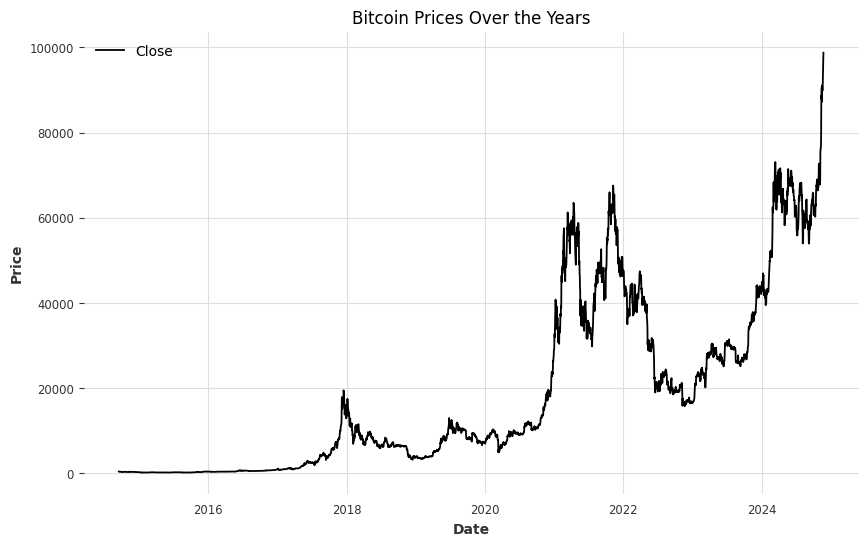

In [8]:
bitcoin_data.plot.line(y='Close', figsize=(10,6), use_index=True)
plt.title('Bitcoin Prices Over the Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [9]:
date_to_check = '2024-11-19'

# Ensure the index is of datetime type
bitcoin_data.index = pd.to_datetime(bitcoin_data.index)

# Check if the date exists using .loc
if date_to_check in bitcoin_data.index:
    print(f"Data for {date_to_check} exists:")
    print(bitcoin_data.loc[date_to_check])
else:
    print(f"Data for {date_to_check} does not exist.")

Data for 2024-11-19 exists:
Open            9.053681e+04
High            9.400287e+04
Low             9.042698e+04
Close           9.234379e+04
Volume          7.452105e+10
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2024-11-19 00:00:00, dtype: float64


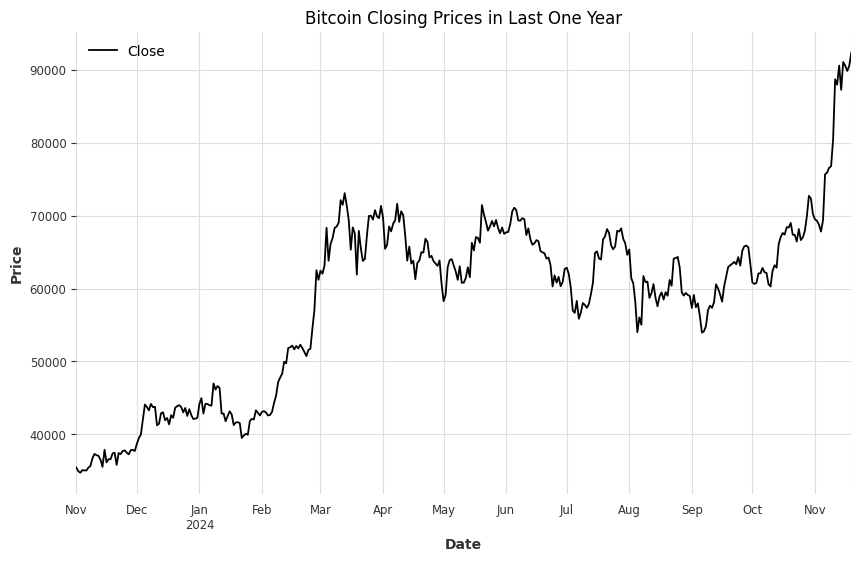

In [10]:
btc_one_year = bitcoin_data.loc['2023-11-01':'2024-11-19']
btc_one_year.plot.line(y='Close',figsize=(10,6),use_index=True)
plt.title('Bitcoin Closing Prices in Last One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
wiki = pd.read_csv("E:\wikipedia_edits.csv", index_col=0, parse_dates=True)

In [12]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-11-17,0.500000,0.030374,0.080556
2024-11-18,0.500000,0.030374,0.080556
2024-11-19,0.500000,0.030374,0.080556
2024-11-20,0.500000,0.026002,0.080556


In [13]:
wiki.columns = [col.title() for col in wiki.columns]
wiki.columns

Index(['Edit_Count', 'Sentiment', 'Neg_Sentiment'], dtype='object')

In [14]:
bitcoin_data = bitcoin_data.merge(wiki, left_index=True, right_index=True)

In [15]:
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Edit_Count,Sentiment,Neg_Sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,5.033333,-0.232192,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,5.233333,-0.204018,0.532718
...,...,...,...,...,...,...,...,...,...,...
2024-11-16,91064.367188,91763.945312,90094.226562,90558.476562,44333192814,0.0,0.0,0.500000,0.030374,0.080556
2024-11-17,90558.460938,91433.039062,88741.664062,89845.851562,46350159305,0.0,0.0,0.500000,0.030374,0.080556
2024-11-18,89843.718750,92596.789062,89393.593750,90542.640625,75535775084,0.0,0.0,0.500000,0.030374,0.080556
2024-11-19,90536.812500,94002.867188,90426.984375,92343.789062,74521048295,0.0,0.0,0.500000,0.030374,0.080556


In [16]:
bitcoin_data.shape

(3718, 10)

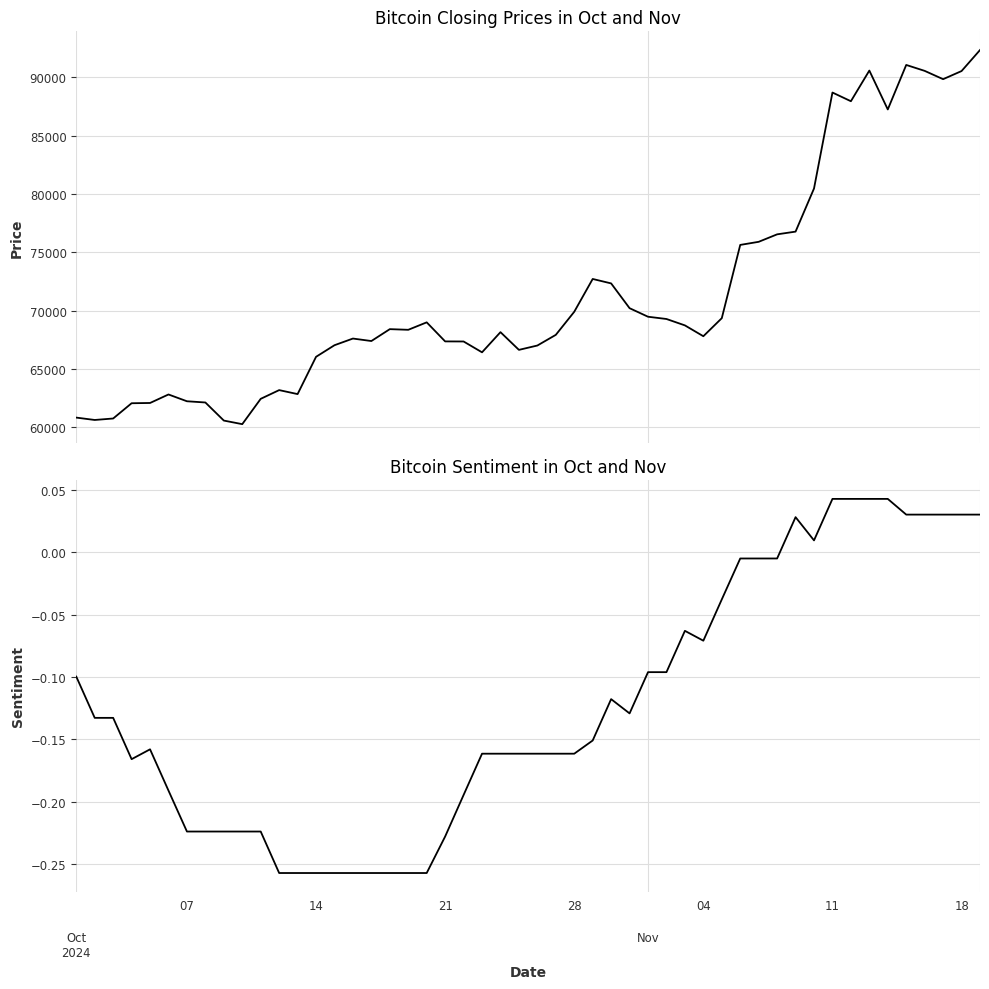

In [17]:
bitcoin_subset = bitcoin_data.loc['2024-10-01':'2024-11-19']

# Define the figure and subplots
fig, axes = plt.subplots(2,1, figsize=(10, 10), sharex=True)

# First subplot: Bitcoin Closing Prices
bitcoin_subset['Close'].plot(
    ax=axes[0],
    title='Bitcoin Closing Prices in Oct and Nov',
    ylabel='Price'
)

# Second subplot: Bitcoin Sentiment
bitcoin_subset['Sentiment'].plot(
    ax=axes[1],
    title='Bitcoin Sentiment in Oct and Nov',
    ylabel='Sentiment'
)

# Add a shared x-axis label
axes[1].set_xlabel('Date')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [18]:
bitcoin_data["Tomorrow"] = bitcoin_data["Close"].shift(-1)

In [19]:
bitcoin_data["Target"] = (bitcoin_data["Tomorrow"] > bitcoin_data["Close"]).astype(int)

In [20]:
bitcoin_data["Target"].value_counts()

Target
1    1966
0    1752
Name: count, dtype: int64

In [21]:
bitcoin_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Edit_Count,Sentiment,Neg_Sentiment,Tomorrow,Target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,5.033333,-0.232192,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,5.233333,-0.204018,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-16,91064.367188,91763.945312,90094.226562,90558.476562,44333192814,0.0,0.0,0.500000,0.030374,0.080556,89845.851562,0
2024-11-17,90558.460938,91433.039062,88741.664062,89845.851562,46350159305,0.0,0.0,0.500000,0.030374,0.080556,90542.640625,1
2024-11-18,89843.718750,92596.789062,89393.593750,90542.640625,75535775084,0.0,0.0,0.500000,0.030374,0.080556,92343.789062,1
2024-11-19,90536.812500,94002.867188,90426.984375,92343.789062,74521048295,0.0,0.0,0.500000,0.030374,0.080556,94339.492188,1


**Random Forest model**

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = bitcoin_data.iloc[:-200]
test = bitcoin_data.iloc[-200:]

predictors = ["Close", "Volume", "Open", "High", "Low", "Edit_Count", "Sentiment", "Neg_Sentiment"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [23]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5

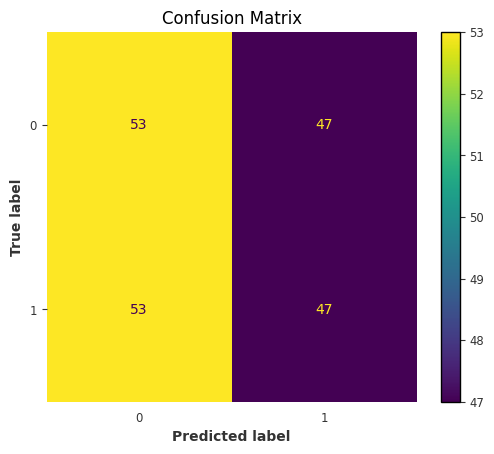

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test["Target"], preds)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

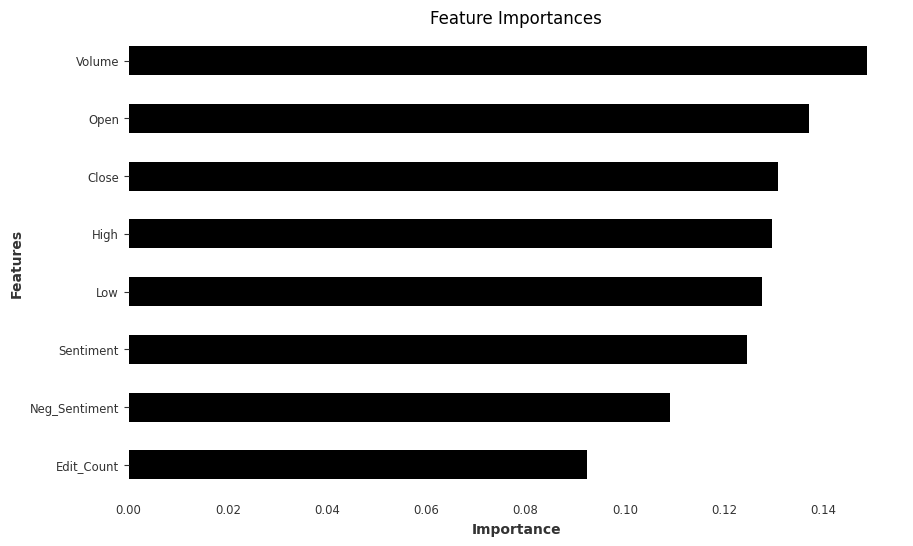

In [30]:
feature_importances = pd.Series(model.feature_importances_, index=predictors)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(False)
plt.show()

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [35]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(bitcoin_data, model, predictors)

In [36]:
predictions["Predictions"].value_counts()

Predictions
1    1490
0    1133
Name: count, dtype: int64

In [37]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5033557046979866

# BTC one-year data 

In [31]:
btc_one_year

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2023-11-01,34657.273438,35527.929688,34170.691406,35437.253906,22446272005,0.0,0.0
2023-11-02,35441.578125,35919.843750,34401.574219,34938.242188,20998158544,0.0,0.0
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,17158456701,0.0,0.0
2023-11-04,34736.324219,35256.031250,34616.691406,35082.195312,9561294264,0.0,0.0
2023-11-05,35090.011719,35340.339844,34594.242188,35049.355469,12412743996,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-15,87284.179688,91868.742188,87124.898438,91066.007812,78243109518,0.0,0.0
2024-11-16,91064.367188,91763.945312,90094.226562,90558.476562,44333192814,0.0,0.0
2024-11-17,90558.460938,91433.039062,88741.664062,89845.851562,46350159305,0.0,0.0
2024-11-18,89843.718750,92596.789062,89393.593750,90542.640625,75535775084,0.0,0.0


In [38]:
# Extracting Closing Price variable
btc_one_year = btc_one_year[['Close']].copy()
btc_one_year

,Close
2023-11-01,35437.253906
2023-11-02,34938.242188
2023-11-03,34732.324219
2023-11-04,35082.195312
2023-11-05,35049.355469
...,...
2024-11-15,91066.007812
2024-11-16,90558.476562
2024-11-17,89845.851562
2024-11-18,90542.640625


In [39]:
# Convert dataframe to Darts TimeSeries
series = TimeSeries.from_dataframe(btc_one_year, value_cols='Close', freq='D')

**Train-test split with 80% training data** 

In [40]:
# Train-test split with 80% training data 
train, val = series.split_before(0.8)

In [41]:
# Initialize models
arima_model = AutoARIMA()  
ets_model = ExponentialSmoothing()  
prophet_model = Prophet() 

In [42]:
# Fit models
arima_model.fit(train)
ets_model.fit(train)
prophet_model.fit(train)

00:33:44 - cmdstanpy - INFO - Chain [1] start processing
00:33:45 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [43]:
# Forecast horizon
forecast_horizon = len(val)

In [44]:
# Predict with each model
arima_forecast = arima_model.predict(forecast_horizon)
ets_forecast = ets_model.predict(forecast_horizon)
prophet_forecast = prophet_model.predict(forecast_horizon)

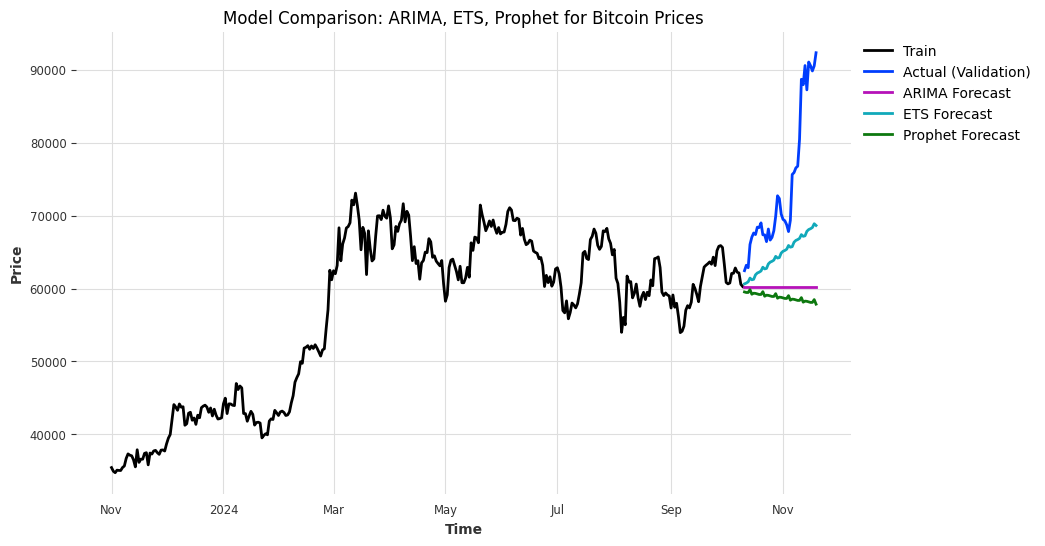

In [63]:
# Plot the results
plt.figure(figsize=(10, 6))
train.plot(label='Train')
val.plot(label='Actual (Validation)', lw=2)
arima_forecast.plot(label='ARIMA Forecast', lw=2)
ets_forecast.plot(label='ETS Forecast', lw=2)
prophet_forecast.plot(label='Prophet Forecast', lw=2)
plt.title('Model Comparison: ARIMA, ETS, Prophet for Bitcoin Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [47]:
# Calculate performance metrics
from darts.metrics import mae, rmse

print("MAE - ARIMA:", np.round(mae(val, arima_forecast),3))
print("MAE - ETS:", np.round(mae(val, ets_forecast),3))
print("MAE - Prophet:", np.round(mae(val, prophet_forecast),3))
print('\n')
print("RMSE - ARIMA:", np.round(rmse(val, arima_forecast),3))
print("RMSE - ETS:", np.round(rmse(val, ets_forecast),3))
print("RMSE - Prophet:", np.round(rmse(val, prophet_forecast),3))

MAE - ARIMA: 9195.238
MAE - ETS: 3986.005
MAE - Prophet: 10996.391


RMSE - ARIMA: 12876.566
RMSE - ETS: 5979.141
RMSE - Prophet: 14924.63


In [48]:
# Refit models on full data and predict future values
arima_model.fit(series)
ets_model.fit(series)
prophet_model.fit(series)

00:35:26 - cmdstanpy - INFO - Chain [1] start processing
00:35:27 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [49]:
forecast_horizon_future = 30  # 30 periods into the future

In [50]:
arima_future_forecast = arima_model.predict(forecast_horizon_future)
ets_future_forecast = ets_model.predict(forecast_horizon_future)
prophet_future_forecast = prophet_model.predict(forecast_horizon_future)

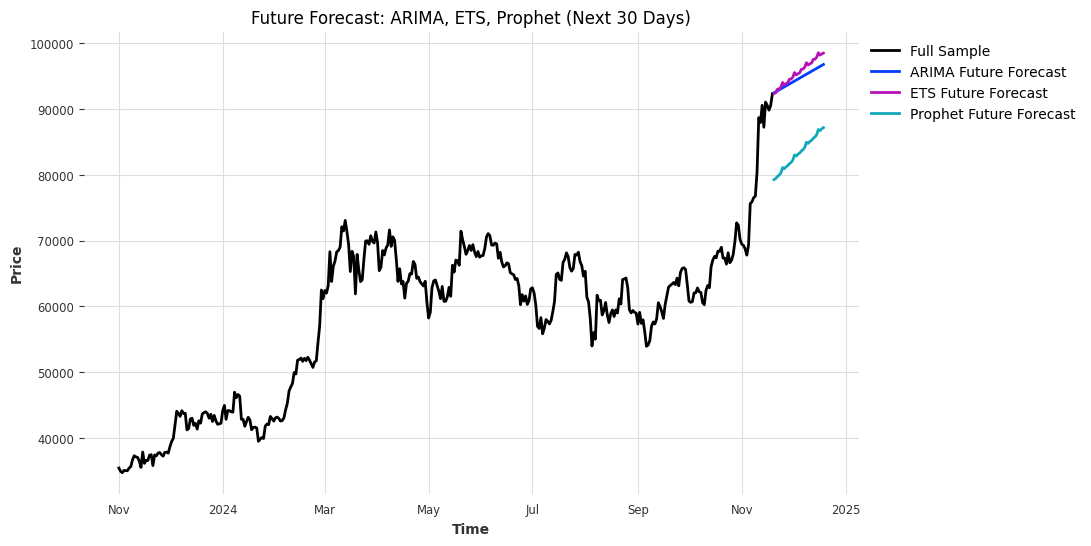

In [62]:
# Plot future forecasts
plt.figure(figsize=(10, 6))
series.plot(label='Full Sample')

arima_future_forecast.plot(label='ARIMA Future Forecast', lw=2)
ets_future_forecast.plot(label='ETS Future Forecast', lw=2)
prophet_future_forecast.plot(label='Prophet Future Forecast', lw=2)

plt.title('Future Forecast: ARIMA, ETS, Prophet (Next 30 Days)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

**Train-test split with 90% training data**

In [52]:
# Train-test split with 90% training data 
train, val = series.split_before(0.9)

In [53]:
# Fit models
arima_model.fit(train)
ets_model.fit(train)
prophet_model.fit(train)

00:36:32 - cmdstanpy - INFO - Chain [1] start processing
00:36:32 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [54]:
# Forecast horizon
forecast_horizon = len(val)

In [55]:
# Predict with each model
arima_forecast = arima_model.predict(forecast_horizon)
ets_forecast = ets_model.predict(forecast_horizon)
prophet_forecast = prophet_model.predict(forecast_horizon)

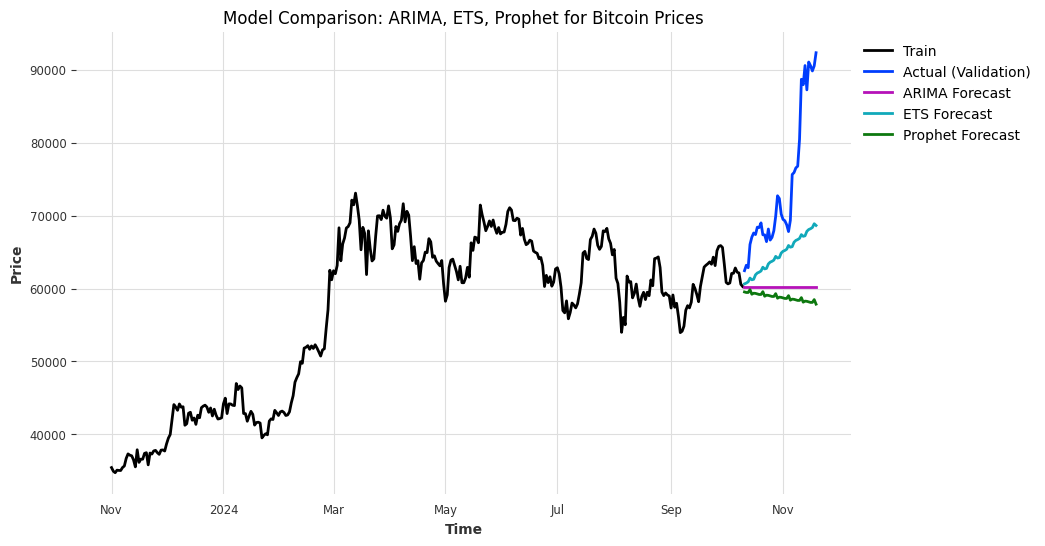

In [61]:
# Plot the results
plt.figure(figsize=(10, 6))
train.plot(label='Train')
val.plot(label='Actual (Validation)', lw=2)
arima_forecast.plot(label='ARIMA Forecast', lw=2)
ets_forecast.plot(label='ETS Forecast', lw=2)
prophet_forecast.plot(label='Prophet Forecast', lw=2)
plt.title('Model Comparison: ARIMA, ETS, Prophet for Bitcoin Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [57]:
# Calculate performance metrics
from darts.metrics import mae, rmse

print("MAE - ARIMA:", np.round(mae(val, arima_forecast),3))
print("MAE - ETS:", np.round(mae(val, ets_forecast),3))
print("MAE - Prophet:", np.round(mae(val, prophet_forecast),3))

print("\nRMSE - ARIMA:", np.round(rmse(val, arima_forecast),3))
print("RMSE - ETS:", np.round(rmse(val, ets_forecast),3))
print("RMSE - Prophet:", np.round(rmse(val, prophet_forecast),3))

MAE - ARIMA: 13658.986
MAE - ETS: 9259.941
MAE - Prophet: 15119.249

RMSE - ARIMA: 16550.279
RMSE - ETS: 11766.018
RMSE - Prophet: 17987.583


In [ ]:
# Refit models on full data and predict future values
arima_model.fit(series)
ets_model.fit(series)
prophet_model.fit(series)

00:37:14 - cmdstanpy - INFO - Chain [1] start processing
00:37:14 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [59]:
arima_future_forecast = arima_model.predict(forecast_horizon_future)
ets_future_forecast = ets_model.predict(forecast_horizon_future)
prophet_future_forecast = prophet_model.predict(forecast_horizon_future)

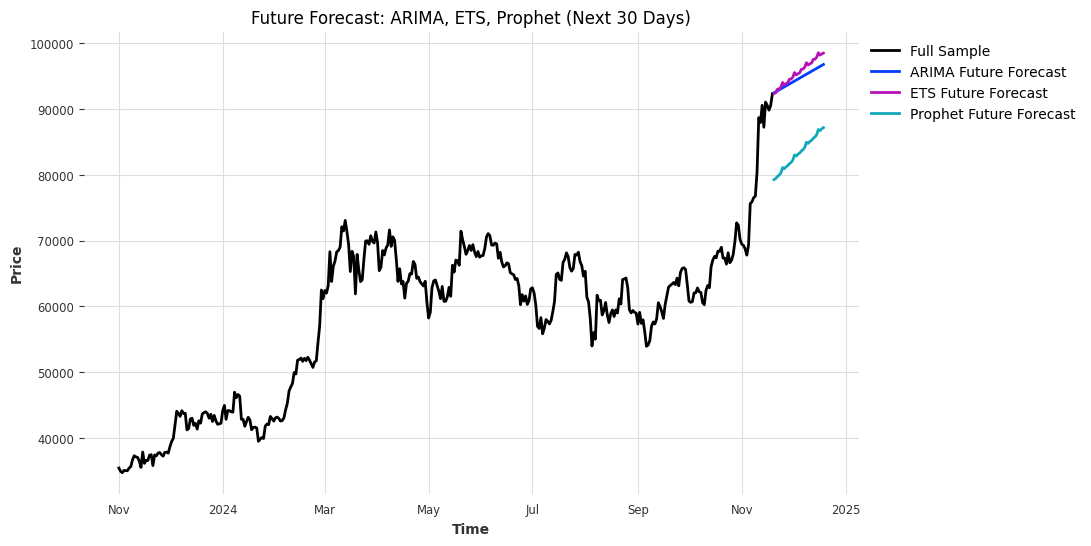

In [64]:
# Plot future forecasts
plt.figure(figsize=(10, 6))
series.plot(label='Full Sample')

arima_future_forecast.plot(label='ARIMA Future Forecast', lw=2)
ets_future_forecast.plot(label='ETS Future Forecast', lw=2)
prophet_future_forecast.plot(label='Prophet Future Forecast', lw=2)

plt.title('Future Forecast: ARIMA, ETS, Prophet (Next 30 Days)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()